In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
import os

from experiment.toolkits.figure_formatting.formatter import *
from experiment.toolkits.statistical_analysis.statistical_analysis import *

In [2]:
colours = [[255, 0, 133], [0, 156, 250], [255, 230, 0]]
for i in range(len(colours)):
    for j in range(len(colours[i])):
        colours[i][j] /= 255
second_colours = [[255, 181, 201], [181, 222, 255], [255, 250, 219]]
for i in range(len(second_colours)):
    for j in range(len(colours[i])):
        second_colours[i][j] /= 255
print(colours, second_colours)

[[1.0, 0.0, 0.5215686274509804], [0.0, 0.611764705882353, 0.9803921568627451], [1.0, 0.9019607843137255, 0.0]] [[1.0, 0.7098039215686275, 0.788235294117647], [0.7098039215686275, 0.8705882352941177, 1.0], [1.0, 0.9803921568627451, 0.8588235294117647]]


In [3]:
# x=['(230, 25, 75)', '(60, 180, 75)', '(255, 225, 25)', '(0, 130, 200)', '(245, 130, 48)', '(145, 30, 180)', '(70, 240, 240)', '(240, 50, 230)', '(210, 245, 60)', '(250, 190, 212)', '(0, 128, 128)', '(220, 190, 255)', '(170, 110, 40)', '(255, 250, 200)', '(128, 0, 0)', '(170, 255, 195)', '(128, 128, 0)', '(255, 215, 180)', '(0, 0, 128)', '(128, 128, 128)', '(255, 255, 255)', '(0, 0, 0)']
# x=[eval(i) for i in x[:-2]]
# x = ['#ff6c6b','#da8548','#98be65','4db5bd','ECBE7B', '51afef','2257A0','c678dd','a9a1e1','46D9FF']
# x = ["1c110a","e4d6a7","e9b44c","9b2915","50a2a7","e3c0d3","95818d","28965a","2a6041","ff7477"]
# x = ["b6d094","e1aa7d","be8a60","6a2e35","2e2836","118ab2","073b4c","993955","ae76a6","a3c3d9"] # too dark.
# x = ["eaedba","d2c57a","ba6b36","850a16","47010e","28566c","193838","6d80d4","164e03","35a15d"]
# x = ["d0d6ea","a3b6ce","6fb2ba","33a97a","208452","924f4e","6a414e","cfb59a","4f2388","b065ab"]
# x = ["c91e1e","edf5d5","dbb479","3a9cb5","a2a1e6","e3e6aa","6dd6a9","4e8dcc","db4939","2bcf1f"]
x = ["c53a3c", "4c7ca4", "5ca05a", "8d5b94", "d68029", "dede54", "905b3c", "e495bf"]


# np.random.shuffle(x)

hex_to_rgb = lambda h: tuple(int(h.lstrip('#')[i : i + 2], 16) for i in (0, 2, 4))


def cmyk_to_rgb(cmyk, rgb_scale=255):
    r = 255 * (1 - cmyk[0] / 100) * (1 - cmyk[3] / 100)
    g = 255 * (1 - cmyk[1] / 100) * (1 - cmyk[3] / 100)
    b = 255 * (1 - cmyk[2] / 100) * (1 - cmyk[3] / 100)

    return r, g, b


def rgb_to_cmyk(rgb):
    RGB_SCALE = 255
    CMYK_SCALE = 100
    (r, g, b) = rgb
    if (r, g, b) == (0, 0, 0):
        # black
        return 0, 0, 0, CMYK_SCALE

    # rgb [0,255] -> cmy [0,1]
    c = 1 - r / RGB_SCALE
    m = 1 - g / RGB_SCALE
    y = 1 - b / RGB_SCALE

    # extract out k [0, 1]
    min_cmy = min(c, m, y)
    c = (c - min_cmy) / (1 - min_cmy)
    m = (m - min_cmy) / (1 - min_cmy)
    y = (y - min_cmy) / (1 - min_cmy)
    k = min_cmy

    # rescale to the range [0,CMYK_SCALE]
    return c * CMYK_SCALE, m * CMYK_SCALE, y * CMYK_SCALE, k * CMYK_SCALE


rgb_to_hex = lambda rgb: '%02x%02x%02x' % tuple([int(i) for i in rgb])
cmyk_to_hex = lambda cmyk: rbg_to_hex(cmyk_to_rgb(cmyk))

x = [hex_to_rgb(xi) for xi in x]
color = [rgb_to_hex(xi) for xi in x]
markeredgecolor = [
    rgb_to_hex(cmyk_to_rgb((c, m, y, np.min([k + 25, 100])))) for c, m, y, k in [rgb_to_cmyk(xi) for xi in x]
]
print(f"axes.prop_cycle: cycler('color', {color})+cycler('markeredgecolor', {markeredgecolor})")


axes.prop_cycle: cycler('color', ['c53a3c', '4c7ca4', '5ca05a', '8d5b94', 'd68029', 'dede54', '905b3c', 'e495bf'])+cycler('markeredgecolor', ['852728', '2e4b64', '376036', '503354', '96591c', '9e9e3b', '503221', 'a46b89'])


In [4]:
phi = (1 + np.sqrt(5))/2
print(phi)

1.618033988749895


2.8336409233342246 65.33151927508506 (-8.418692889739859, 88.41869288973986) 0.0 80.0 8.418692889739859


(-8.418692889739859, 88.41869288973986)

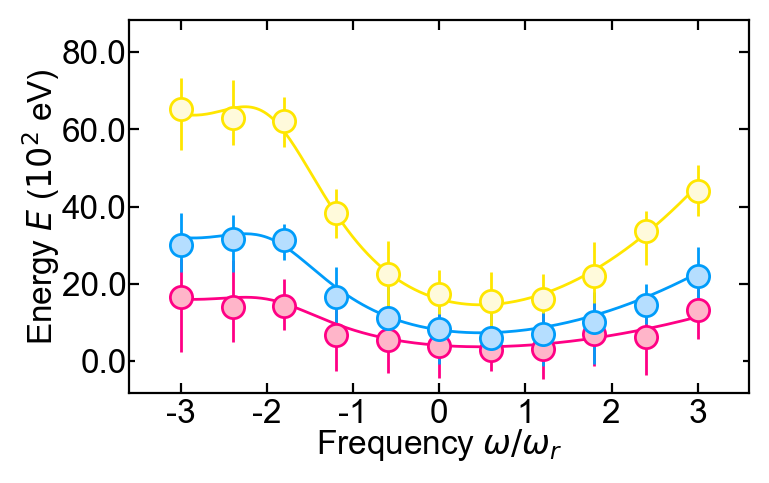

In [5]:
ymax = 0
ymin = 100

with plt.style.context([r'C:\Users\tqtraaqs\Desktop\tqtraaqs_git\matplotlibrc\styles\TQT-RAAQS.mplstyle']):
    fig, ax = plt.subplots(figsize=(4, 4 / phi))
    nx = 11
    npoints = 20
    for j, scale in enumerate([1, 2, 4]):
        x = np.linspace(-3, 3, nx, endpoint=True)
        x = np.tile(x, (npoints, 1))
        y_pre = scale * (x * x + 10 / ((x + 2) * (x + 2) + 1) + 2)
        y = y_pre + np.random.normal(0, 8, (npoints, nx))

        def f(x):
            return scale * (x * x + 10 / ((x + 2) * (x + 2) + 1) + 2)

        mean, yerr = asymmetric_error(y.T)
        if np.max(mean) > ymax:
            ymax = np.max(mean)
        if np.min(mean) < ymin:
            ymin = np.min(mean)

        ax.errorbar(
            x[0],
            mean,
            yerr=yerr,
            ecolor=colours[j],
            marker='o',
            markerfacecolor=second_colours[j],
            markeredgecolor=colours[j],
            markeredgewidth=1,
            markersize=8,
            ls='none',
        )

        x = np.linspace(-3, 3, 200)
        ax.plot(x, f(x), color=colours[j], marker='', ls='-')

        # ax.errorbar(x_values, y_data, yerr=error_bars, capsize=5, capthick=0.5, ecolor='black', fmt='none')

ax.set_xlabel(r'Frequency $\omega/\omega_r$', fontsize=12, fontname='Arial', labelpad=-1)
ax.set_ylabel(r'Energy $E$ ($10^2$ eV)', fontsize=12, fontname='Arial', labelpad=0)

ax.set_xticks(np.arange(-5, 6))

ax.set_xticklabels(ax.get_xticks(), fontname='arial', fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontname='arial', fontsize=12)

ax.tick_params(axis="y", direction="in", pad=1)
ax.tick_params(axis="x", direction="in", pad=2)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
# ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%.1f'))

xmax = np.max(x)
xmin = np.min(x)
x_range = xmax - xmin
xlim = (xmin - x_range * 0.1, xmax + x_range * 0.1)

y_range = ymax - ymin


yticks = ax.get_yticks()
i = 0
while yticks[i] < ymin - y_range * 0.1:
    i += 1
ytick_bottom = yticks[i]
i = len(yticks) - 1
while yticks[i] > ymax + y_range * 0.1:
    i -= 1
ytick_top = yticks[i + 1]

delta = max(abs(ymin - y_range * 0.1 - ytick_bottom), abs(ymax + y_range * 0.1 - ytick_top))

ylim = (ytick_bottom - delta, ytick_top + delta)

ax.set_xlim(xlim)
print(ymin, ymax, ylim, ytick_bottom, ytick_top, delta)
ax.set_ylim(ylim)


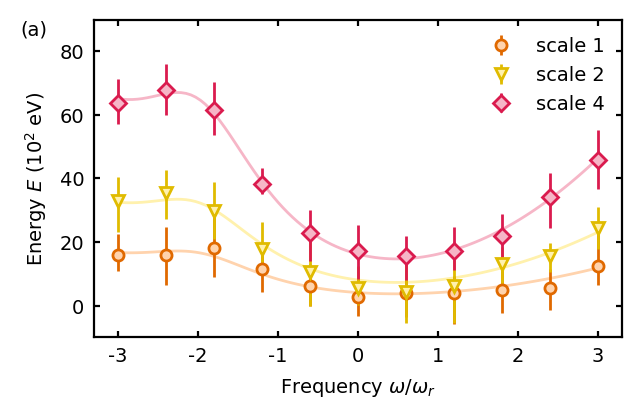

In [14]:
with plt.style.context([r'C:\Users\tqtraaqs\Desktop\tqtraaqs_git\matplotlibrc\styles\TQT-RAAQS.mplstyle']):
    fig, ax = plt.subplots()
    set_palette(ax, '2')
    for j, scale in enumerate([1, 2, 4]):
        x = np.linspace(-3, 3, nx, endpoint=True)
        x = np.tile(x, (npoints, 1))
        y_pre = scale * (x * x + 10 / ((x + 2) * (x + 2) + 1) + 2)
        y = y_pre + np.random.normal(0, 8, (npoints, nx))

        def f(x):
            return scale * (x * x + 10 / ((x + 2) * (x + 2) + 1) + 2)

        if np.max(mean) > ymax:
            ymax = np.max(mean)
        if np.min(mean) < ymin:
            ymin = np.min(mean)
        mean, yerr = asymmetric_error(y.T)

        plot_scatter(
            ax,
            x[0],
            mean,
            yerr=yerr,
            series_params={
                'label': f'scale {scale}',
            },
            fit_params={
                'equation': lambda x, scale: scale * (x * x + 10 / ((x + 2) * (x + 2) + 1) + 2),
                'fit_xlim': [-3, 3, 100],
            },
        )
    format_plot(
        ax,
        {
            'xtitle': 'Frequency',
            'xvariable': r'\omega/\omega_r',
            'ytitle': 'Energy',
            'yvariable': 'E',
            'yunits': '$10^2$ eV',
            'xticks': [-3, -2, -1, 0, 1, 2, 3],
#             'yticks': [1e1,1e2,1e3,1e4],
            'caption_label': ['a', 'aps'],
#             'yscale':'log',
#             'grid':True,
            'legend': True,
        },
    )

print_figure(fig, name='scatter_plot', filetype='pdf')